In [1]:
import numpy as np
import pandas as pd
import pylab as pl
# pl.rc("figure",facecolor="gray")

read in data

In [12]:
checkpoints=['000500','000600','000700','000800','001000','001050','001100']
rootdir='Checkpoints/'
corr_matrices={}
for checkpoint in checkpoints:
    df=pd.DataFrame(columns=('team','agent_id','val'))
    team_names=('red','blue')
    num_players_per_team=3
    for team in team_names:
        for agent_id in range(num_players_per_team):
            datatmp=np.load(rootdir+'checkpoint_'+checkpoint+'/checkpoint-'+str(int(checkpoint))+'_values_'+team+'_'+str(agent_id)+'.npy',allow_pickle=True).flatten()
            df=df.append({'team':team,'agent_id':agent_id,'val':datatmp},ignore_index=True)
    corr_matrices[checkpoint]=pd.DataFrame.from_dict(dict(zip(df.val.index, df.val.values))).corr(method='spearman')

Plot rank correlation

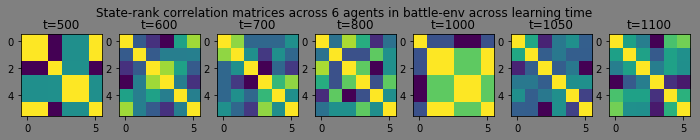

In [22]:
fig,ax=pl.subplots(1,len(checkpoints),figsize=(12,2))

for cit,checkpoint in enumerate(checkpoints):
    ax[cit].imshow(corr_matrices[checkpoint])
    ax[cit].set_title('t='+str(int(checkpoint)))
fig.suptitle('State-rank correlation matrices across 6 agents in battle-env across learning time')
fig.savefig('rankcorr_matrices.pdf', transparent=True,bbox_inches="tight",dpi=300)

## inspect matrix at one checkpoint

In [23]:
corr_matrix=corr_matrices[checkpoint]

variance explained

In [31]:
eigen_values, eigen_vectors = np.linalg.eig(corr_matrix)
percent_variance_explained=[]
for ev in np.sort(eigen_values)[::-1]:
     percent_variance_explained.append((ev/sum(eigen_values))*100)

Text(0, 0.5, '% explained')

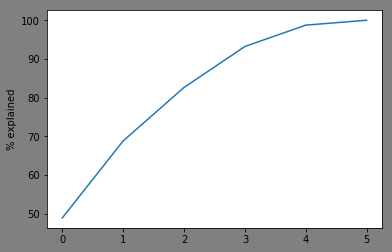

In [32]:
fig,ax=pl.subplots()
ax.plot(np.cumsum(percent_variance_explained))
ax.set_ylabel('% explained')

statistics

In [13]:
df_short=df.copy()
df_short.val=df_short.val.apply(lambda x:x[:15])

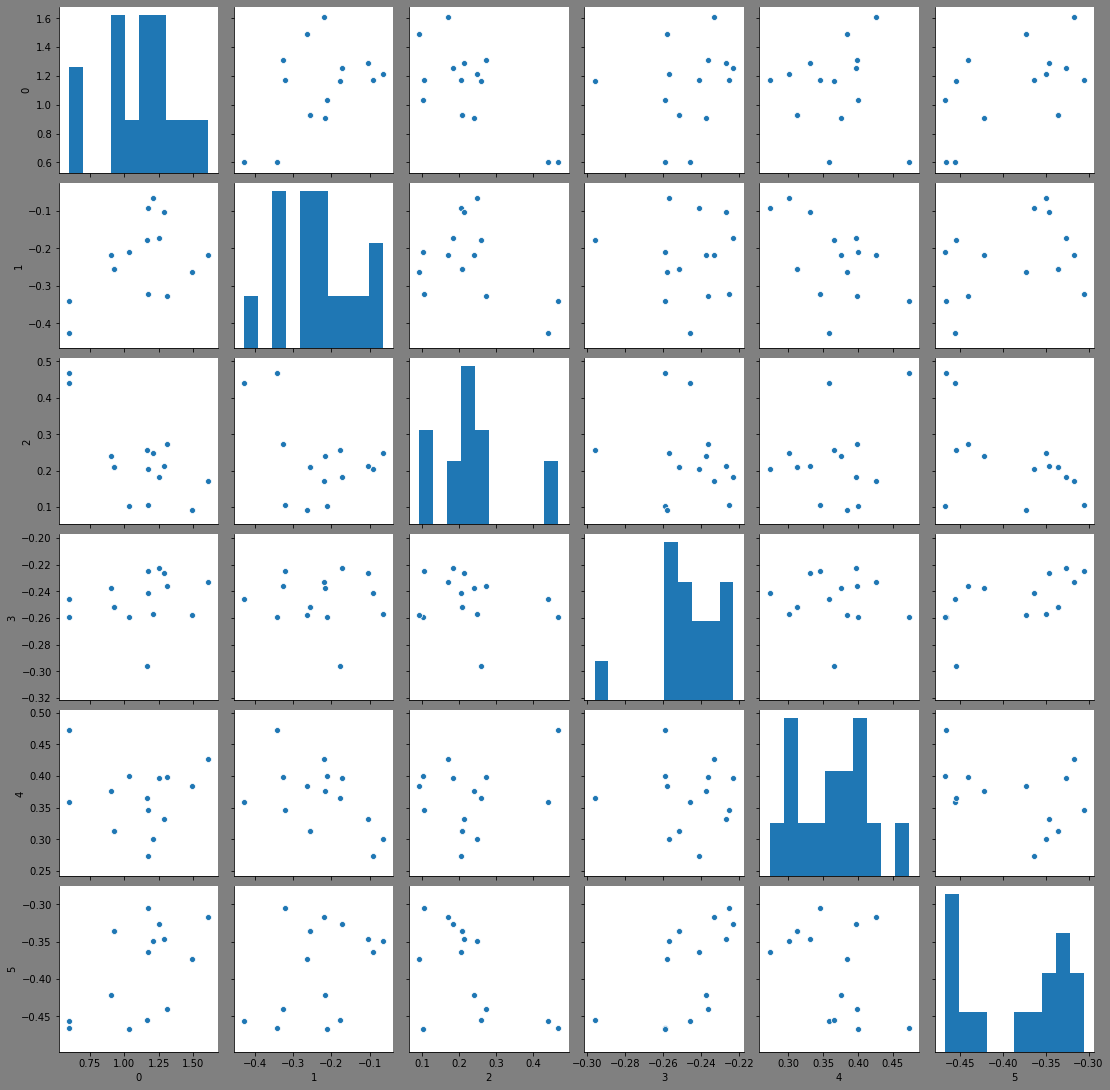

In [19]:
import seaborn as sns
sns.pairplot(data=pd.DataFrame.from_dict(dict(zip(df_short.val.index, df_short.val.values))), kind='scatter')
pl.show()